# News Articles Data Mining Notebook

In this notebook we are going to deal with data from various news articles of diggerent kinds(business,
entertainment, politics, sport and tech). We are going to create wordclouds, and perform classification and clustering for our data.

## Import Libraries


In [285]:
# Ignoring unnecessory warnings
import warnings
warnings.filterwarnings("ignore")  
# Specialized container datatypes
import collections
# For Map vizualization
import folium
from nltk.corpus import genesis
# For data vizualization 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# For large and multi-dimensional arrays
import numpy as np
# For data manipulation and analysis
import pandas as pd
# Natural language processing library
import nltk
nltk.download('genesis')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import gensim
from gensim.parsing.preprocessing import remove_stopwords
from gensim.parsing.preprocessing import STOPWORDS
# For image processing
from PIL import Image, ImageOps
# For random selection 
import random
# For basic cleaning and data preprocessing 
import re
import string 
# Communicating with operating and file system
import os
# Machine learning libary
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support 
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import NearestNeighbors
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, normalize, label_binarize
from sklearn.svm import SVC
# For wordcloud generating 
from wordcloud import WordCloud

[nltk_data] Downloading package genesis to
[nltk_data]     /Users/pantelis/nltk_data...
[nltk_data]   Package genesis is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pantelis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/pantelis/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Create and load datasets

Given a directory with all the data, we create 2 different data frames; one for training our algorithms, and one for testing. We use a python script that we created, and can be found in the parent directory of the project

In [2]:
%run create_dataset.py --dir data --out data/dataset.tsv
TRAIN_DATASET = "./data/train_set.tsv"
TEST_DATASET = "./data/test_set.tsv"
train_df = pd.read_csv(TRAIN_DATASET, sep='\t')
test_df = pd.read_csv(TEST_DATASET, sep='\t')

---------------------- Constructing dataset ----------------------

Running with the following configuration
	 dir --> data
	 out --> data/dataset.tsv

Creating datasets...
	An error occured on reading file: /Users/pantelis/Desktop/News-Articles-Classification/data/sport/199.txt
Datasets creating completed successfully. Time elapsed: 1.317 seconds


Let's look at the dataset info to see if everything is alright.

In [3]:
train_df.info()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1779 entries, 0 to 1778
Data columns (total 4 columns):
Id          1779 non-null int64
Title       1779 non-null object
Content     1779 non-null object
Category    1779 non-null object
dtypes: int64(1), object(3)
memory usage: 55.7+ KB


,Id,Title,Content,Category
0,12,Patti Smith to host arts festival\n,\nRock star Patti Smith has been made artistic...,entertainment
1,480,Markets fall on weak dollar fears\n,\nRising oil prices and the sinking dollar hit...,business
2,1801,Asylum children to face returns\n,\nThe UK government is planning to return asyl...,politics
3,1861,Ask Jeeves joins web log market\n,\nAsk Jeeves has bought the Bloglines website ...,tech
4,243,Johnny and Denise lose Passport\n,\nJohnny Vaughan and Denise Van Outen's Saturd...,entertainment


In [4]:
test_df.info()
test_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 4 columns):
Id          445 non-null int64
Title       445 non-null object
Content     445 non-null object
Category    445 non-null object
dtypes: int64(1), object(3)
memory usage: 14.0+ KB


,Id,Title,Content,Category
0,367,REM concerts blighted by illness\n,\nUS rock band REM have been forced to cancel ...,entertainment
1,1709,Terror detainees win Lords appeal\n,\nDetaining foreign terrorist suspects without...,politics
2,1741,Could rivalry overshadow election?\n,\nTony Blair and Gordon Brown are desperately ...,politics
3,887,US crude prices surge above $53\n,\nUS crude prices have soared to fresh four-mo...,business
4,1398,Wada will appeal against ruling\n,\nThe World Anti-Doping Agency (Wada) will app...,sport


## 1. Wordclouds

We are going to create one wordcloud for each category

### Business articles

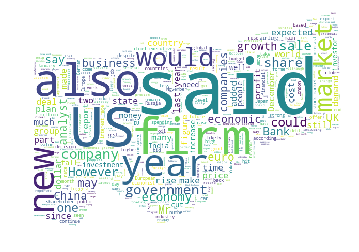

In [5]:
maskImageArray = np.array(Image.open("wordcloud_masks/business.png"))
stop_words = nltk.corpus.stopwords.words('english')
business_wordcloud = WordCloud(max_words=1000,mask=maskImageArray, background_color="white", stopwords=stop_words).generate(' '.join(train_df.loc[train_df['Category'] == 'business']['Content'].tolist()))
plt.imshow(business_wordcloud)
plt.axis('off')
plt.show()

### Entertainment articles

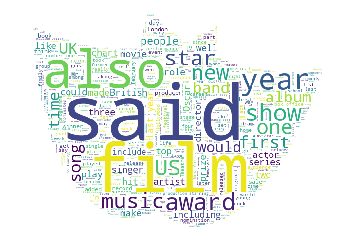

In [6]:
maskImageArray = np.array(Image.open("wordcloud_masks/entairtenment.png"))
stop_words = nltk.corpus.stopwords.words('english')
ent_wordcloud = WordCloud(max_words=1000,mask=maskImageArray, background_color="white", stopwords=stop_words).generate(' '.join(train_df.loc[train_df['Category'] == 'entertainment']['Content'].tolist()))
plt.imshow(ent_wordcloud)
plt.axis('off')
plt.show()

### Politics articles


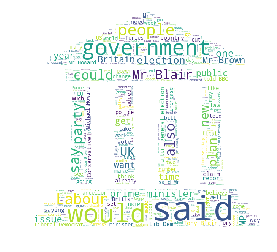

In [7]:
maskImageArray = np.array(Image.open("wordcloud_masks/politics.png"))
stop_words = nltk.corpus.stopwords.words('english')
pol_wordcloud = WordCloud(max_words=1000,mask=maskImageArray, background_color="white", stopwords=stop_words).generate(' '.join(train_df.loc[train_df['Category'] == 'politics']['Content'].tolist()))
plt.imshow(pol_wordcloud)
plt.axis('off')
plt.show()

### Sports articles

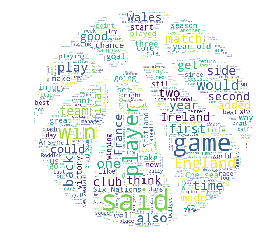

In [8]:
maskImageArray = np.array(Image.open("wordcloud_masks/sports.png"))
stop_words = nltk.corpus.stopwords.words('english')
sport_wordcloud = WordCloud(max_words=1000,mask=maskImageArray, background_color="white", stopwords=stop_words).generate(' '.join(train_df.loc[train_df['Category'] == 'sport']['Content'].tolist()))
plt.imshow(sport_wordcloud)
plt.axis('off')
plt.show()

### Tech articles

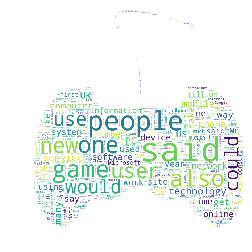

In [9]:
maskImageArray = np.array(Image.open("wordcloud_masks/tech.png"))
stop_words = nltk.corpus.stopwords.words('english')
tech_wordcloud = WordCloud(max_words=1000,mask=maskImageArray, background_color="white", stopwords=stop_words).generate(' '.join(train_df.loc[train_df['Category'] == 'tech']['Content'].tolist()))
plt.imshow(tech_wordcloud)
plt.axis('off')
plt.show()

## 2. Classification 

### Data Preprocessing

Firstly, we have to preprocess our training and test set. We have to consider preprocessing on both title and content columns in order to have homogenous preprocessed data.

In [5]:
 def text_normalization(text):
    # convert text to lowercase
    text = text.lower()
    # remove all special characters, punctuation and spaces from string
    text = re.sub(r'\W+',' ', text)
    # remove stop words
    removed = remove_stopwords(text)
    text = "".join(removed)
    # Perform lemamatization
    lemmatizer = WordNetLemmatizer()
    lem_sentence = []
    token_words = word_tokenize(text)
    lem_sentence = [lemmatizer.lemmatize(word) for word in token_words]
    text = " ".join(lem_sentence)
    # return normalized text
    return text

In [6]:
def preprocess(input_df):
    # Remove rows with missing values in column col
    input_df.dropna(inplace=True)
    # Speed up code using numpy vectorization
    vfunc = np.vectorize(text_normalization)
    input_df.Title = vfunc(input_df.Title.values)
    input_df.Content = vfunc(input_df.Content.values)
    # return processed input_df
    return input_df

Let's apply the above preprocessing techniques on training set

In [7]:
preprocessed_train_df = preprocess(train_df)

In [8]:
preprocessed_train_df.insert(3, "Description", 
                             preprocessed_train_df['Title'] + ' ' + preprocessed_train_df['Content'], 
                             True)

In [9]:
preprocessed_train_df.head()

,Id,Title,Content,Description,Category
0,12,patti smith host art festival,rock star patti smith artistic director year s...,patti smith host art festival rock star patti ...,entertainment
1,480,market fall weak dollar fear,rising oil price sinking dollar hit share mond...,market fall weak dollar fear rising oil price ...,business
2,1801,asylum child face return,uk government planning return asylum seeker ch...,asylum child face return uk government plannin...,politics
3,1861,ask jeeves join web log market,ask jeeves bought bloglines website improve wa...,ask jeeves join web log market ask jeeves boug...,tech
4,243,johnny denise lose passport,johnny vaughan denise van outen s saturday nig...,johnny denise lose passport johnny vaughan den...,entertainment


Let's apply now the above preprocessing techniques on test set

In [10]:
preprocessed_test_df = preprocess(test_df)

In [11]:
preprocessed_test_df.insert(3, "Description", 
                             preprocessed_test_df['Title'] + ' ' + preprocessed_test_df['Content'], 
                             True)

In [12]:
preprocessed_test_df.head()

,Id,Title,Content,Description,Category
0,367,rem concert blighted illness,rock band rem forced cancel concert bass playe...,rem concert blighted illness rock band rem for...,entertainment
1,1709,terror detainee win lord appeal,detaining foreign terrorist suspect trial brea...,terror detainee win lord appeal detaining fore...,politics
2,1741,rivalry overshadow election,tony blair gordon brown desperately trying stu...,rivalry overshadow election tony blair gordon ...,politics
3,887,crude price surge 53,crude price soared fresh month high 53 refiner...,crude price surge 53 crude price soared fresh ...,business
4,1398,wada appeal ruling,world anti doping agency wada appeal acquittal...,wada appeal ruling world anti doping agency wa...,sport


### Base Classifier 

Below, we introduce a base classifier class which will be used from each classifier in order to inherit the steps of prediction pipeline. Also, kfold cross-validation is implemented there in an an abstract logic as well.

In [216]:
class Classifier:
    def __init__(self, classifier_name, train_df, test_df, feature):
        self.classifier_name = classifier_name
        self.feature = feature
        self.steps = []
        # Encode labels with value the different articles' categories
        self.le = LabelEncoder()
        self.le.fit(train_df['Category'])
        # define x_train and y_train
        self.x_train = train_df['Description']
        self.y_train = self.le.transform(train_df['Category'])
        # define x_test
        self.x_test = test_df['Description'] if not test_df is None else None
        self.y_test = self.le.transform(test_df['Category']) if not test_df is None else None

    def define_features(self):
        self.steps = []
        if self.feature == "TF-IDF":
            self.steps.append(('vect', TfidfVectorizer()))
        elif self.feature == "BoW":
            self.steps.append(('vect', CountVectorizer(stop_words='english')))            
        return self.steps

    def predict_kfold(self, pipeline):
        score_array = []
        accuracy_array = []
        # apply 10-fold cross validation
        kf = KFold(n_splits=10)
        for train_index, test_index in kf.split(self.x_train):
            # use iloc which is label based indexing
            cv_train_x = self.x_train.iloc[train_index]
            cv_test_x = self.x_train.iloc[test_index]
            cv_train_y = self.y_train[train_index]
            cv_test_y = self.y_train[test_index]
            # fit model
            pipeline.fit(cv_train_x, cv_train_y)
            if (self.classifier_name == "SVM"):
                print("Best parameters set found on development set:")
                print()
                print(pipeline.named_steps['clf'].best_params_)
                print()
                print("Grid scores on development set:")
                print()
                means = pipeline.named_steps['clf'].cv_results_['mean_test_score']
                stds = pipeline.named_steps['clf'].cv_results_['std_test_score']
                for mean, std, params in zip(means, stds, pipeline.named_steps['clf'].cv_results_['params']):
                    print("%0.3f (+/-%0.03f) for %r"
                          % (mean, std * 2, params))
                print()
            # predict label in form of numbers {0,1,2,3,4}
            predicted = pipeline.predict(cv_test_x) 
            # apply inverse transform to get labels
            y_labels = self.le.inverse_transform(cv_test_y)
            y_pred = self.le.inverse_transform(predicted)
            # append score and accuracy values to corresponding arrays
            score_array.append(precision_recall_fscore_support(y_labels, y_pred, average=None))
            accuracy_array.append(accuracy_score(y_labels, y_pred))                    
        # compute classification report metrics
        avg_accuracy = round(np.mean(accuracy_array), 4)
        avg_scores = np.mean(np.mean(score_array, axis=0), axis=1)
        avg_precision = round(avg_scores[0], 4)
        avg_recall = round(avg_scores[1], 4)
        avg_f1 = round(avg_scores[2], 4)
        return (avg_accuracy, avg_precision, avg_recall, avg_f1)
    
    def get_test_metrics(self, pipeline):
        y_pred = pipeline.predict(self.x_test)
        accuracy = accuracy_score(self.y_test, y_pred)
        precision, recall, f1, _ = precision_recall_fscore_support(self.y_test, y_pred, average='weighted')
        return accuracy, precision, recall, f1
        
    def plot_roc_auc(self, pipeline):
        classes = ['Business', 'Entertainment', 'Politics', 'Sport', 'Tech']
        scores = pipeline.predict_proba(self.x_test)
        y_test = label_binarize(self.y_test, classes=[0, 1, 2, 3, 4])
        y_pred = np.argmax(scores, axis=1)
        n_classes = y_test.shape[1]
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], scores[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        colors = ['blue', 'red', 'green', 'orange', 'yellow']
        for i, color in zip(range(n_classes), colors):
            plt.plot(fpr[i], tpr[i], color=color,
                     label='ROC curve of class {0} (area = {1:0.4f})'
                     ''.format(classes[i], roc_auc[i]))

        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([-0.05, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic for multi-class data')
        plt.legend(loc="lower right")
        plt.show()

### Support Vector Machine (SVM)

In [211]:
class SVM(Classifier):
    def __init__(self, train_df, test_df, feature):
        self.tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
        Classifier.__init__(self, "SVM", train_df, test_df, feature)

    def define_features(self):
        steps = Classifier.define_features(self)
        steps.append(('clf', GridSearchCV(SVC(), self.tuned_parameters)))
        self.pipeline = Pipeline(steps)

    def run_kfold(self):
        self.define_features()
        return self.predict_kfold(self.pipeline)
    
    def evaluate(self):
        self.plot_roc_auc(self.pipeline)
        return self.get_test_metrics(self.pipeline)

#### Bag of Words featurization method

In [ ]:
classifier = SVM(preprocessed_train_df, preprocessed_test_df, "BoW")

In [ ]:
accuracy, precision, recall, f1  = classifier.run_kfold()

In [ ]:
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1-Score: {:.2f}%".format(f1 * 100))

#### TF-IDF featurization method

In [ ]:
classifier = SVM(preprocessed_train_df, preprocessed_test_df, "TF-IDF")

In [ ]:
cv_accuracy, cv_precision, cv_recall, cv_f1  = classifier.run_kfold()

In [ ]:
print("10-fold Cross Validation Accuracy: {:.2f}%".format(cv_accuracy * 100))
print("10-fold Cross Validation Precision: {:.2f}%".format(cv_precision * 100))
print("10-fold Cross Validation Recall: {:.2f}%".format(cv_recall * 100))
print("10-fold Cross Validation F1-Score: {:.2f}%".format(cv_f1 * 100))

In [ ]:
test_accuracy, test_precision, test_recall, test_f1 = classifier.evaluate()
print("Test set Accuracy: {:.2f}%".format(test_accuracy * 100))
print("Test set Precision: {:.2f}%".format(test_precision * 100))
print("Test set Recall: {:.2f}%".format(test_recall * 100))
print("Test set F1-Score: {:.2f}%".format(test_f1 * 100))

###  Random Forests

In [34]:
class RandomForest(Classifier):

    def __init__(self, train_df, test_df, feature):
        Classifier.__init__(self, "RF", train_df, test_df, feature)

    def define_features(self):
        steps = Classifier.define_features(self)
        steps.append(('clf', RandomForestClassifier(n_estimators = 100, criterion = 'entropy')))
        self.pipeline = Pipeline(steps)

    def run_kfold(self):
        self.define_features()
        return self.predict_kfold(self.pipeline)
    
    def evaluate(self):
        self.plot_roc_auc(self.pipeline)
        return self.get_test_metrics(self.pipeline)

#### Bag of Words featurization method

In [35]:
classifier = RandomForest(preprocessed_train_df, preprocessed_test_df, "BoW")

In [36]:
cv_accuracy, cv_precision, cv_recall, cv_f1 = classifier.run_kfold()
print("10-fold Cross Validation Accuracy: {:.2f}%".format(cv_accuracy * 100))
print("10-fold Cross Validation Precision: {:.2f}%".format(cv_precision * 100))
print("10-fold Cross Validation Recall: {:.2f}%".format(cv_recall * 100))
print("10-fold Cross Validation F1-Score: {:.2f}%".format(cv_f1 * 100))

10-fold Cross Validation Accuracy: 96.23%
10-fold Cross Validation Precision: 96.46%
10-fold Cross Validation Recall: 95.99%
10-fold Cross Validation F1-Score: 96.14%


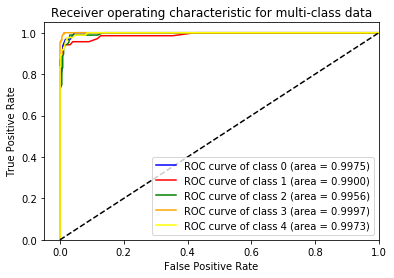

Test set Accuracy: 94.83%
Test set Precision: 94.99%
Test set Recall: 94.83%
Test set F1-Score: 94.83%


In [37]:
test_accuracy, test_precision, test_recall, test_f1 = classifier.evaluate()
print("Test set Accuracy: {:.2f}%".format(test_accuracy * 100))
print("Test set Precision: {:.2f}%".format(test_precision * 100))
print("Test set Recall: {:.2f}%".format(test_recall * 100))
print("Test set F1-Score: {:.2f}%".format(test_f1 * 100))

#### TF-IDF featurization method

In [38]:
classifier = RandomForest(preprocessed_train_df, preprocessed_test_df, "TF-IDF")

In [39]:
cv_accuracy, cv_precision, cv_recall, cv_f1 = classifier.run_kfold()
print("10-fold Cross Validation Accuracy: {:.2f}%".format(cv_accuracy * 100))
print("10-fold Cross Validation Precision: {:.2f}%".format(cv_precision * 100))
print("10-fold Cross Validation Recall: {:.2f}%".format(cv_recall * 100))
print("10-fold Cross Validation F1-Score: {:.2f}%".format(cv_f1 * 100))

10-fold Cross Validation Accuracy: 96.23%
10-fold Cross Validation Precision: 96.51%
10-fold Cross Validation Recall: 96.06%
10-fold Cross Validation F1-Score: 96.19%


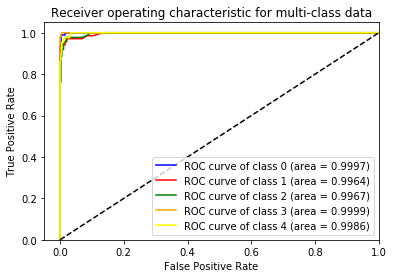

Test set Accuracy: 96.18%
Test set Precision: 96.26%
Test set Recall: 96.18%
Test set F1-Score: 96.18%


In [40]:
test_accuracy, test_precision, test_recall, test_f1 = classifier.evaluate()
print("Test set Accuracy: {:.2f}%".format(test_accuracy * 100))
print("Test set Precision: {:.2f}%".format(test_precision * 100))
print("Test set Recall: {:.2f}%".format(test_recall * 100))
print("Test set F1-Score: {:.2f}%".format(test_f1 * 100))

### Naive Bayes

In [49]:
class NaiveBayes(Classifier):

    def __init__(self, train_df, test_df, feature):
        Classifier.__init__(self, "NB", train_df, test_df, feature)

    def define_features(self):
        steps = Classifier.define_features(self)
        steps.append(('clf', MultinomialNB()))
        self.pipeline = Pipeline(steps)

    def run_kfold(self):
        self.define_features()
        return self.predict_kfold(self.pipeline)
    
    def evaluate(self):
        self.plot_roc_auc(self.pipeline)
        return self.get_test_metrics(self.pipeline)

#### Bag of Words featurization method

In [50]:
classifier = NaiveBayes(preprocessed_train_df, preprocessed_test_df, "BoW")

In [51]:
cv_accuracy, cv_precision, cv_recall, cv_f1 = classifier.run_kfold()
print("10-fold Cross Validation Accuracy: {:.2f}%".format(cv_accuracy * 100))
print("10-fold Cross Validation Precision: {:.2f}%".format(cv_precision * 100))
print("10-fold Cross Validation Recall: {:.2f}%".format(cv_recall * 100))
print("10-fold Cross Validation F1-Score: {:.2f}%".format(cv_f1 * 100))

10-fold Cross Validation Accuracy: 97.64%
10-fold Cross Validation Precision: 97.58%
10-fold Cross Validation Recall: 97.69%
10-fold Cross Validation F1-Score: 97.58%


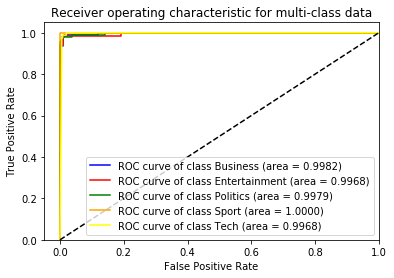

Test set Accuracy: 97.08%
Test set Precision: 97.17%
Test set Recall: 97.08%
Test set F1-Score: 97.06%


In [52]:
test_accuracy, test_precision, test_recall, test_f1 = classifier.evaluate()
print("Test set Accuracy: {:.2f}%".format(test_accuracy * 100))
print("Test set Precision: {:.2f}%".format(test_precision * 100))
print("Test set Recall: {:.2f}%".format(test_recall * 100))
print("Test set F1-Score: {:.2f}%".format(test_f1 * 100))

#### TF-IDF featurization method

In [53]:
classifier = NaiveBayes(preprocessed_train_df, preprocessed_test_df, "TF-IDF")

In [54]:
cv_accuracy, cv_precision, cv_recall, cv_f1 = classifier.run_kfold()
print("10-fold Cross Validation Accuracy: {:.2f}%".format(cv_accuracy * 100))
print("10-fold Cross Validation Precision: {:.2f}%".format(cv_precision * 100))
print("10-fold Cross Validation Recall: {:.2f}%".format(cv_recall * 100))
print("10-fold Cross Validation F1-Score: {:.2f}%".format(cv_f1 * 100))

10-fold Cross Validation Accuracy: 96.85%
10-fold Cross Validation Precision: 96.92%
10-fold Cross Validation Recall: 96.73%
10-fold Cross Validation F1-Score: 96.77%


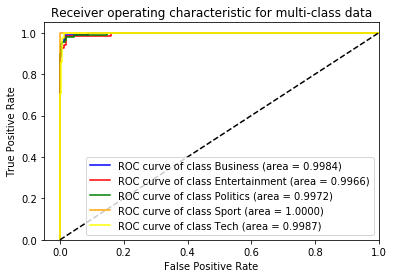

Test set Accuracy: 95.96%
Test set Precision: 96.12%
Test set Recall: 95.96%
Test set F1-Score: 95.93%


In [55]:
test_accuracy, test_precision, test_recall, test_f1 = classifier.evaluate()
print("Test set Accuracy: {:.2f}%".format(test_accuracy * 100))
print("Test set Precision: {:.2f}%".format(test_precision * 100))
print("Test set Recall: {:.2f}%".format(test_recall * 100))
print("Test set F1-Score: {:.2f}%".format(test_f1 * 100))

###  K-Nearest Neighbor

In [255]:
class KNeighborsClassifier(object):
    """ A kNN classifier with L2 distance """

    def __init__(self, n_neighbors=1):
        """
        Class constructor
        Inputs:
        - n_neighbors: Hyperparameter k for kNN Classifier - default is 1
        """
        self.k = n_neighbors

    def fit(self, X, y):
        """
        Fit the classifier. For k-nearest neighbors this is just
        memorizing the training data.
        Inputs:
        - X: A numpy array of shape (num_train, D) containing the training data
          consisting of num_train samples each of dimension D.
        - y: A numpy array of shape (N,) containing the training labels, where
             y[i] is the label for X[i].
        """
        self.X_train = X.toarray()
        self.y_train = y

    def predict(self, X):
        """
        Predict labels for test data using this classifier.
        Inputs:
        - X: A numpy array of shape (num_test, D) containing test data consisting
             of num_test samples each of dimension D.
        - k: The number of nearest neighbors that vote for the predicted labels.
        Returns:
        - y: A numpy array of shape (num_test,) containing predicted labels for the
          test data, where y[i] is the predicted label for the test point X[i].
        """
        return self.predict_labels(self.compute_distances(X.toarray()))
    
    def predict_proba(self, X):
        """
        Predict probabilities of each labels for test data using this classifier.
        Inputs:
        - X: A numpy array of shape (num_test, D) containing test data consisting
             of num_test samples each of dimension D.
        Returns:
        - y: A numpy array of shape (num_test, num_classes) containing predicted 
             probabilities of each label for the test data, where y[i] corresponds
             to test point X[i].
        """
        pass
        

    def compute_distances(self, X):
        """
        Compute the distance between each test point in X and each training point
        in self.X_train using no explicit loops.
         Inputs:
        - X: A numpy array of shape (num_test, D) containing test data.
        Returns:
        - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
          is the Euclidean distance between the ith test point and the jth training
          point.
        """
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        #########################################################################
        # Compute the l2 distance between all test points and all training      #
        # points without using any explicit loops, and store the result in      #
        # dists.                                                                #
        #########################################################################
        test_square = np.sum(np.square(X), axis = 1).reshape(num_test, 1)
        train_square = np.sum(np.square(self.X_train), axis = 1).reshape(1, num_train)
        dists = np.sqrt(test_square + train_square - 2 * np.dot(X, self.X_train.T))

        return dists

    def predict_labels(self, dists):
        """
        Given a matrix of distances between test points and training points,
        predict a label for each test point.
        Inputs:
        - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
          gives the distance betwen the ith test point and the jth training point.
        Returns:
        - y: A numpy array of shape (num_test,) containing predicted labels for the
          test data, where y[i] is the predicted label for the test point X[i].
        """
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            # A list of length k storing the labels of the k nearest neighbors to
            # the ith test point.
            closest_y = []
            #########################################################################
            # Use the distance matrix to find the k nearest neighbors of the ith    #
            # testing point, and use self.y_train to find the labels of these       #
            # neighbors. Store these labels in closest_y.                           #
            #########################################################################
            min_idxs = np.argpartition(dists[i],self.k)[:self.k]
            for min_idx in min_idxs:
                closest_y.append(self.y_train[min_idx])
            #########################################################################
            # Now that you have found the labels of the k nearest neighbors, you    #
            # need to find the most common label in the list closest_y of labels.   #
            # Store this label in y_pred[i]. Break ties by choosing the smaller     #
            # label.                                                                #
            #########################################################################
            y_pred[i] = np.bincount(closest_y).argmax()

        return list(map(int, y_pred.tolist()))
    
    def predict_probabilities(self, dits):
        """
        Given a matrix of distances between test points and training points,
        predict probabilities of each label for every test point.
        Inputs:
        - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
          gives the distance betwen the ith test point and the jth training point.
        Returns:
        - y: A numpy array of shape (num_test, num_classes) containing predicted 
             probabilities of each label for the test data, where y[i] corresponds
             to test point X[i].
        """
        pass

In [256]:
class KNN(Classifier):

    def __init__(self, train_df, test_df, feature):
        Classifier.__init__(self, "KNN", train_df, test_df, feature)

    def define_features(self):
        steps = Classifier.define_features(self)
        steps.append(('clf', KNeighborsClassifier()))
        self.pipeline = Pipeline(steps)

    def run_kfold(self):
        self.define_features()
        return self.predict_kfold(self.pipeline)
    
    def evaluate(self):
        return self.get_test_metrics(self.pipeline)

####  Bag of Words featurization method

In [257]:
classifier = KNN(preprocessed_train_df, preprocessed_test_df, "BoW")

In [258]:
cv_accuracy, cv_precision, cv_recall, cv_f1 = classifier.run_kfold()
print("10-fold Cross Validation Accuracy: {:.2f}%".format(cv_accuracy * 100))
print("10-fold Cross Validation Precision: {:.2f}%".format(cv_precision * 100))
print("10-fold Cross Validation Recall: {:.2f}%".format(cv_recall * 100))
print("10-fold Cross Validation F1-Score: {:.2f}%".format(cv_f1 * 100))

10-fold Cross Validation Accuracy: 72.68%
10-fold Cross Validation Precision: 79.85%
10-fold Cross Validation Recall: 72.19%
10-fold Cross Validation F1-Score: 72.93%


In [259]:
test_accuracy, test_precision, test_recall, test_f1 = classifier.evaluate()
print("Test set Accuracy: {:.2f}%".format(test_accuracy * 100))
print("Test set Precision: {:.2f}%".format(test_precision * 100))
print("Test set Recall: {:.2f}%".format(test_recall * 100))
print("Test set F1-Score: {:.2f}%".format(test_f1 * 100))

Test set Accuracy: 74.61%
Test set Precision: 80.25%
Test set Recall: 74.61%
Test set F1-Score: 74.77%


####  TD-IDF featurization method

In [261]:
classifier = KNN(preprocessed_train_df, preprocessed_test_df, "TF-IDF")

In [262]:
cv_accuracy, cv_precision, cv_recall, cv_f1 = classifier.run_kfold()
print("10-fold Cross Validation Accuracy: {:.2f}%".format(cv_accuracy * 100))
print("10-fold Cross Validation Precision: {:.2f}%".format(cv_precision * 100))
print("10-fold Cross Validation Recall: {:.2f}%".format(cv_recall * 100))
print("10-fold Cross Validation F1-Score: {:.2f}%".format(cv_f1 * 100))

10-fold Cross Validation Accuracy: 92.97%
10-fold Cross Validation Precision: 92.88%
10-fold Cross Validation Recall: 92.84%
10-fold Cross Validation F1-Score: 92.75%


In [263]:
test_accuracy, test_precision, test_recall, test_f1 = classifier.evaluate()
print("Test set Accuracy: {:.2f}%".format(test_accuracy * 100))
print("Test set Precision: {:.2f}%".format(test_precision * 100))
print("Test set Recall: {:.2f}%".format(test_recall * 100))
print("Test set F1-Score: {:.2f}%".format(test_f1 * 100))

Test set Accuracy: 90.56%
Test set Precision: 90.80%
Test set Recall: 90.56%
Test set F1-Score: 90.56%


## 3. Beat the Benchmark

In order to beat the Benchmark we are going to use a Voting classifier model combines multiple different models (i.e., sub-estimators) into a single model, which is (ideally) stronger than any of the individual models alone.

In [97]:
class BeatTheBenchmark(Classifier):

    def __init__(self, train_df, test_df, feature):
        Classifier.__init__(self, "NB", train_df, test_df, feature)

    def define_features(self):
        steps = Classifier.define_features(self)
        
        clf1 = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=100, random_state=1)
        clf2 = RandomForestClassifier(n_estimators=100, criterion='entropy')
        clf3 = SVC(kernel='linear', probability=True)
        steps.append(('clf', VotingClassifier(estimators = [('lr', clf1), ('rf', clf2), ('svm', clf3)], voting='soft', weights=[4, 2, 5])))

        self.pipeline = Pipeline(steps)

    def run_kfold(self):
        self.define_features()
        return self.predict_kfold(self.pipeline)
    
    def evaluate(self):
        self.plot_roc_auc(self.pipeline)
        return self.get_test_metrics(self.pipeline)

In [98]:
classifier = BeatTheBenchmark(preprocessed_train_df, preprocessed_test_df, "BoW")

In [99]:
cv_accuracy, cv_precision, cv_recall, cv_f1 = classifier.run_kfold()
print("10-fold Cross Validation Accuracy: {:.2f}%".format(cv_accuracy * 100))
print("10-fold Cross Validation Precision: {:.2f}%".format(cv_precision * 100))
print("10-fold Cross Validation Recall: {:.2f}%".format(cv_recall * 100))
print("10-fold Cross Validation F1-Score: {:.2f}%".format(cv_f1 * 100))

10-fold Cross Validation Accuracy: 97.02%
10-fold Cross Validation Precision: 97.11%
10-fold Cross Validation Recall: 97.01%
10-fold Cross Validation F1-Score: 97.01%


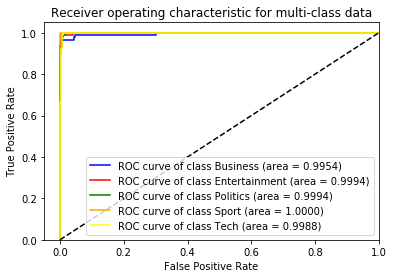

Test set Accuracy: 98.20%
Test set Precision: 98.22%
Test set Recall: 98.20%
Test set F1-Score: 98.20%


In [100]:
test_accuracy, test_precision, test_recall, test_f1 = classifier.evaluate()
print("Test set Accuracy: {:.2f}%".format(test_accuracy * 100))
print("Test set Precision: {:.2f}%".format(test_precision * 100))
print("Test set Recall: {:.2f}%".format(test_recall * 100))
print("Test set F1-Score: {:.2f}%".format(test_f1 * 100))

As we can cleary see, we beated the benchmark!

## 4. Clustering

### BoW + PCA

In [77]:
X = CountVectorizer(stop_words='english').fit_transform(preprocessed_train_df['Description']).toarray()
pca = PCA(n_components=3)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

We need only the calculated resulting components scores for the elements in our data set:

In [269]:
scores_pca = pca.transform(X)
print(scores_pca)

[[-0.05243808 -0.0360191   0.08353055]
 [ 0.05401291  0.12767167 -0.08636258]
 [ 0.05027382 -0.02419308  0.05026217]
 ...
 [ 0.00125336  0.06922323 -0.02544595]
 [-0.05893744  0.07751268  0.03820672]
 [ 0.20139991 -0.0417176   0.01451477]]


Let's now implement K-Means using #Category, aka 5, clusters

In [270]:
kmeans_pca = KMeans(n_clusters=5, init='k-means++', random_state=42)

In [271]:
# We fit our data with the k-means pca model
kmeans_pca.fit(scores_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

It's time now to analyze now PCA and K-Means results

In [272]:
# We create a new data frame with the original features and add the PCA scores and assigned clusters
X_bow_pca_kmeans = pd.concat([pd.DataFrame(X), pd.DataFrame(scores_pca, columns=['Component {}'.format(i) for i in range(1,4)])], axis=1)
# The last column we add contains the pca k-means clusterin labels
X_bow_pca_kmeans['Segment K-means Pca'] = kmeans_pca.labels_

In [274]:
X_bow_pca_kmeans['Segment'] = X_bow_pca_kmeans['Segment K-means Pca'].map({
    0: 'Business',
    1: 'Entertainment',
    2: 'Politics',
    3: 'Sport',
    4: 'Tech'
})

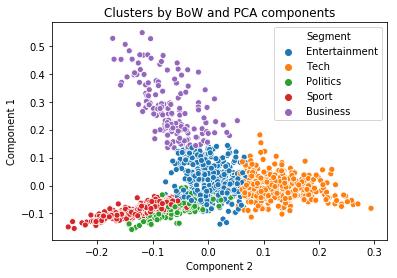

In [276]:
# Plot data by PCA components. The Y-axis is the first component and the X-axis the second one
x_axis = X_bow_pca_kmeans['Component 2']
y_axis = X_bow_pca_kmeans['Component 1']
sns.scatterplot(x_axis, y_axis, hue = X_bow_pca_kmeans['Segment'])
plt.title('Clusters by BoW and PCA components')
plt.show()

#### TF-IDF + PCA

In [277]:
X = TfidfVectorizer().fit_transform(preprocessed_train_df['Description']).toarray()
pca = PCA(n_components=3)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [278]:
scores_pca = pca.transform(X)
print(scores_pca)

[[-0.0524392  -0.03601229  0.08340508]
 [ 0.05400932  0.12781201 -0.08669927]
 [ 0.05027778 -0.02414324  0.05058222]
 ...
 [ 0.00124279  0.06914391 -0.02602122]
 [-0.0589295   0.0774773   0.03834711]
 [ 0.20139725 -0.04163138  0.0148546 ]]


In [279]:
kmeans_pca = KMeans(n_clusters=5, init='k-means++', random_state=42)
# We fit our data with the k-means pca model
kmeans_pca.fit(scores_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [280]:
# We create a new data frame with the original features and add the PCA scores and assigned clusters
X_tfidf_pca_kmeans = pd.concat([pd.DataFrame(X), pd.DataFrame(scores_pca, columns=['Component {}'.format(i) for i in range(1,4)])], axis=1)
# The last column we add contains the pca k-means clusterin labels
X_tfidf_pca_kmeans['Segment K-means Pca'] = kmeans_pca.labels_

In [281]:
X_tfidf_pca_kmeans['Segment'] = X_tfidf_pca_kmeans['Segment K-means Pca'].map({
    0: 'Business',
    1: 'Entertainment',
    2: 'Politics',
    3: 'Sport',
    4: 'Tech'
})

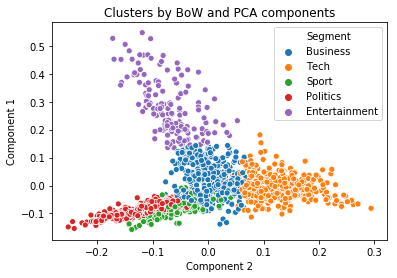

In [282]:
# Plot data by PCA components. The Y-axis is the first component and the X-axis the second one
x_axis = X_tfidf_pca_kmeans['Component 2']
y_axis = X_tfidf_pca_kmeans['Component 1']
sns.scatterplot(x_axis, y_axis, hue = X_tfidf_pca_kmeans['Segment'])
plt.title('Clusters by TF-IDF and PCA components')
plt.show()

#### W2V + PCA

At first we have to train our word embeddings simple by using gensim Word2Vec model

In [288]:
sentences = []
for row in preprocessed_train_df['Description']:
    sentences.append(word_tokenize(row))
model = gensim.models.Word2Vec(sentences, min_count=1, size= 100, workers=3, window =3, sg = 1)

Right after let's compute the embedding vector of each sentences

In [297]:
X = model[model.wv.vocab]
pca = PCA(n_components=3)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [298]:
scores_pca = pca.transform(X)
print(scores_pca)

[[-0.44430834 -0.02936318  0.04191305]
 [ 0.8555187  -0.16658708  1.1845981 ]
 [ 0.8334001  -0.7990124   0.30718207]
 ...
 [-0.5712325   0.01837024 -0.00772003]
 [-0.5521264  -0.03324946 -0.0056484 ]
 [-0.5531953  -0.03647848 -0.03183814]]


In [299]:
kmeans_pca = KMeans(n_clusters=5, init='k-means++', random_state=42)
# We fit our data with the k-means pca model
kmeans_pca.fit(scores_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [300]:
# We create a new data frame with the original features and add the PCA scores and assigned clusters
X_w2v_pca_kmeans = pd.concat([pd.DataFrame(X), pd.DataFrame(scores_pca, columns=['Component {}'.format(i) for i in range(1,4)])], axis=1)
# The last column we add contains the pca k-means clusterin labels
X_w2v_pca_kmeans['Segment K-means Pca'] = kmeans_pca.labels_

In [301]:
X_w2v_pca_kmeans['Segment'] = X_w2v_pca_kmeans['Segment K-means Pca'].map({
    0: 'Business',
    1: 'Entertainment',
    2: 'Politics',
    3: 'Sport',
    4: 'Tech'
})

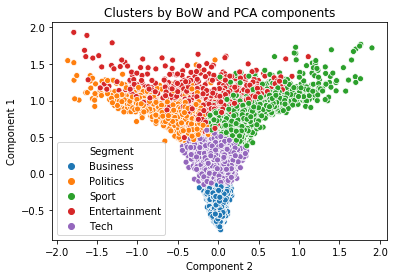

In [302]:
# Plot data by PCA components. The Y-axis is the first component and the X-axis the second one
x_axis = X_w2v_pca_kmeans['Component 2']
y_axis = X_w2v_pca_kmeans['Component 1']
sns.scatterplot(x_axis, y_axis, hue = X_w2v_pca_kmeans['Segment'])
plt.title('Clusters by W2V and PCA components')
plt.show()